Shallow Auto Encoder Example

In [1]:
import keras
from keras import layers

encoded_no = 32 #no of output of the encoder layer

#input image
input_img = keras.Input(shape=(784,))

#encoded representation of the input
#there can be more than one layers for stacking in case of deep auto encoders
encoded_layer = layers.Dense(256, activation='relu')(input_img)
encoded_layer = layers.Dense(128, activation='relu')(encoded_layer)
encoded_layer = layers.Dense(64, activation='relu')(encoded_layer)
encoded_layer = layers.Dense(32, activation='relu')(encoded_layer)
encoded_layer = layers.Dense(16, activation='relu')(encoded_layer)
#adding the encoder layer with l1 regularization so that fewer neurons fire at a time for each training ephoc
#encoded_layer = layers.Dense(encoded_no, activation='relu', activity_regularizer = keras.regularizers.l1(10e-5))(input_img)

#decoded representaion of the input
decoded_layer = layers.Dense(32, activation='relu')(encoded_layer)
decoded_layer = layers.Dense(64, activation='relu')(decoded_layer)
decoded_layer = layers.Dense(128, activation='relu')(decoded_layer)
decoded_layer = layers.Dense(256, activation='relu')(decoded_layer)
decoded_layer = layers.Dense(784, activation='sigmoid')(decoded_layer)


In [2]:
#creating a model
autoencoder = keras.Model(input_img, decoded_layer)
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

#load the MNIST dataset
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

#normalize the dataset
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
#fitting the autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=100,  #training ephoc can be increase after using the regularizer as the chances of overfitting decreses
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 8ms/step - loss: 0.2572 - val_loss: 0.1955
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1758 - val_loss: 0.1558
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1492 - val_loss: 0.1431
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1415 - val_loss: 0.1379
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1373 - val_loss: 0.1355
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1345 - val_loss: 0.1326
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1318 - val_loss: 0.1297
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1289 - val_loss: 0.1267
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1266 - val_loss: 0.1249
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1247 - val_lo

In [4]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 2s 6ms/step


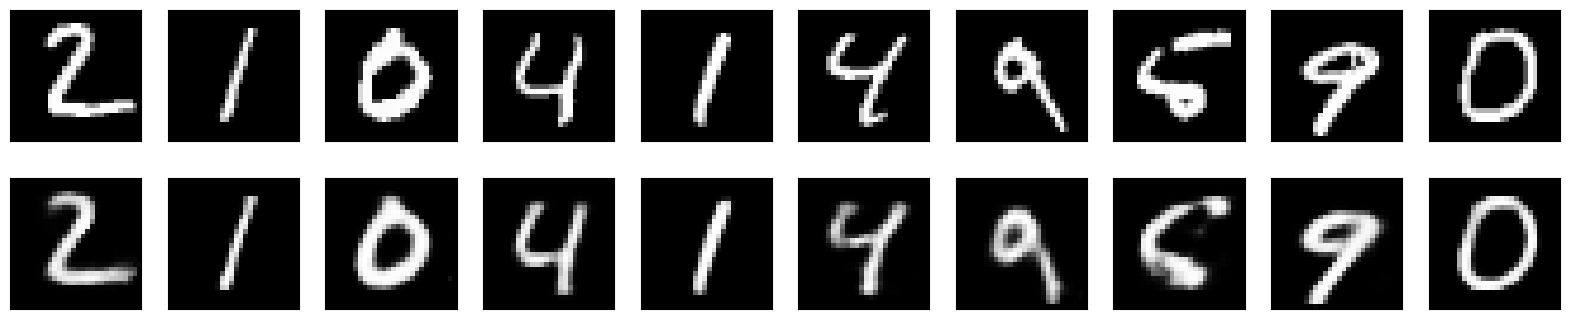

In [5]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()